# Stage 2

# 1. 데이터 전처리

이번 Stage2에서는 앞서 불러온 데이터를 분석 및 모델링 하기 전에 적합한 형태로 만드는 과정을 진행합니다.

데이터 전처리는 분석 결과 및 인사이트와 모델의 성능에 직접적인 영향을 미치는 단계이므로 중요한 과정입니다. 그렇지만, 포브스의 설문조사 결과에 따르면 평균적으로 데이터 분석가 업무 시간의 80%를 데이터 수집 및 전처리에 사용된다고 합니다. 데이터 전처리가 반복적이면서 많은 시간이 소요되는 지루한 과정임을 알 수 있는데요. 

오랜 시간이 걸리는 만큼, 가장 중요한 과정이기도 합니다. 실무에 사용되는 데이터셋은 분석이 불가능할 정도로 지저분한데요. 값이 비어있거나 해당 칼럼에 맞지 않는 데이터가 들어가 경우가 많습니다. 따라서, 이러한 데이터들을 분석이 가능한 상태로 만들 수 있도록 정제하는 과정이 필요합니다.

'Stage2: 데이터 전처리'를 진행하기 앞서, 'Stage1: 데이터 불러오기' 과정을 잊었다면, 아래 링크에 접속하여 복습해주세요. 

<b>[ Stage1: 데이터 불러오기 ]<br>
https://dacon.io/competitions/official/236047/codeshare/7499?page=1&dtype=random

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/val.csv')
test_df = pd.read_csv('/content/test.csv')

 ## 1.1 데이터 결측치 확인하기



stage1에서 불러온 데이터의 결측치를 확인하기 위해, pandas 패키지가 가지고 있는 isnull() 메소드, sum 함수를 사용하겠습니다.

In [ ]:
# 함수 isnull을 활용하여 결측치 확인하기
train_df.isnull()

In [ ]:
# 함수 sum을 활용하여 칼럼별 결측치 확인하기
train_df.isnull().sum()

### **Inst.**

분석에 사용할 데이터의 결측치를 확인해보도록 하겠습니다.

isnull() 메소드로 DataFrame 전체의 결측값 여부를 확인할 수 있습니다.
그리고 sum 함수로 칼럼별 결측값을 구할 수 있는데요.

    ex)
    * df.isnull()
    * df.isnull().sum()

입력되어 있는 코드셀을 확인하고, 직접 실행해보세요!

### **Hint.**

empty

### **Solution.**

empty

데이터 결측치는 누락된 데이터로 값이 표기 되지 않은 값입니다.

    * NA: Not Available (유효하지 않은)
    * NaN: Not a Number (숫자가 아닌)
    * Null: 아무 것도 존재하지 않음

누락된 데이터가 있는 상태로 데이터를 분석하거나 모델링을 진행하면 심각한 오류가 발생하게 됩니다.

결측치를 처리할 때에는 크게 3가지 방법으로 제거, 치환, 예측 모델이 있습니다.

    * 제거: 결측치가 발생한 행 또는 열을 삭제하는 단순한 방식
    * 치환: 결측치를 적당한 방법으로 대체하는 방식(평균, 중간값, 최빈값 등)
    * 예측: 결측치를 예측하는 새로운 모델을 구성, 이를 기반으로 결측치를 채우는 방식

데이터의 특성에 따라 적절한 방법을 선택하여 진행해야 합니다.
결측치의 여부를 확인하는 함수는 isnull()로 결측치가 존재하는 경우 True로 나타납니다.

그럼, 직접 데이터 결측치를 확인해볼까요?

In [ ]:
# 함수 isnull을 활용하여 결측치 여부 확인하기



,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73181,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73182,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 함수 sum을 활용하여 칼럼별 결측치 확인하기



ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    1
V17    1
V18    1
V19    1
V20    1
V21    1
V22    1
V23    1
V24    1
V25    1
V26    1
V27    1
V28    1
V29    1
V30    1
dtype: int64

## 1.2 데이터 표준화하기

모델링 작업에 들어가기 전에 변수들 간의 척도가 다른 경우에는 보통 표준화(scale standization)를 진행합니다.

데이터 변수 V1, V2, V3, ... , V30까지의 변수들은 각각 단위가 다를 것입니다. 이 변수들의 단위를 맞추어 주기 위해 StandardScaler() 함수를 이용하여 train data, val data, test data의 변수들의 단위들을 맞추도록 하겠습니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

# 데이터 표준화하기 전, 의미없는 열 ID 칼럼 제거하기
train = train_df.drop(['ID'],axis=1)
val = val_df.drop(['ID'],axis=1)
test = test_df.drop(['ID'],axis=1)

In [ ]:
# 데이터 표준화하기
train_df = scaler.fit_transform(train)
train_df = pd.DataFrame(train_df,columns=train.columns)

val_df = scaler.transform(val.drop(columns=['Class']))
val_columns = val.columns[:-1]
val_df = pd.DataFrame(val_df,columns=val_columns)
val_df['Class']=val['Class']

test_df=scaler.transform(test)
test_df=pd.DataFrame(test_df,columns=test.columns)

### **Inst.**

그럼 이제 데이터 표준화를 진행해볼까요?<br>
train의 데이터 첫번째 칼럼 'ID'는 index로 활용되기 때문에 'ID'칼럼을 제외한 나머지 칼럼들의 분포를 활용할 것입니다.<br>


#####  **데이터 삭제하기**<br>
데이터 프레임에서 행/열을 삭제할 때에는 drop 메서드를 사용합니다.<br>
drop 메서드는 원본이 변경되지 않기 때문에 만약 원본까지 변경하고 싶다면 inplace 옵션을 활용하면 됩니다.<br>


**drop 메서드에서 자주 사용하는 옵션**

    * labels: 삭제할 레이블 명 지정, axis를 지정해 주어야 합니다.
    * axis: 축으로 label을 사용할 경우 지정해 주어야 합니다.(0 : index, 1 : columns)
    * index: 인덱스 명을 사용하여 삭제합니다.
    * columns: 칼럼명을 사용하여 삭제합니다.
    * inplace: 원본도 변경하고 싶다면 True를 사용합니다. (default : False)

### **Hint.**

empty

### **Solution.**

empty

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

# 데이터 표준화하기 전, 의미없는 열 ID 칼럼 제거하기



In [ ]:
# 데이터 표준화하기



## 1.3 데이터 분포 확인하기

데이터 표준화가 끝나면 데이터 분포를 확인합니다.

**데이터 분포**

    1. 기술 통계(descriptive statistics): 데이터 분포의 특징을 대표할 수 있는 몇가지 숫자를 계산하여 숫자들로부터 데이터의 분포를 추측하는 방법
    2. 히스토그램 (histogram): 자료 값이 가질 수 있는 범위를 몇 개의 구간으로 나누고, 각 구간에 해당하는 값의 숫자 혹은 상대적 빈도를 계산하는 방법 (ex. matplotlib의 hist, seaborn의 histplot)
    3. 커널 밀도 (kernel density): 커널이라고 하는 특정 구간의 분포를 묘사하는 함수의 집합을 활용하여 전체 분포를 묘사하는 방법

히스토그램은 도수분포표를 그래프로 나타낸 것으로, seaborn 모듈의 histplot() 함수를 이용합니다.

**히스토그램 형태로 변형**

    * bins: 구간 개수 지정
    * range: bin의 범위
    * cumulative: 누적 히스토그램 그리고 싶다면 True (default : False)
    * histtype: 히스토그램의 종류 지정 ('bar', 'barstacked', 'step', 'stepfilled') 중에서 선택가능 (defalut: 'bar')

히스토그램을 나타낼 때에는 plt.show()를 통해 나타냅니다.

In [ ]:
# 데이터 분포 확인하기
val_class0 = val[val['Class']==0]
val_class1 = val[val['Class']==1]
columns = val.drop('Class', axis=1).columns

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 
import seaborn as sns 

grid = gridspec.GridSpec(6, 6)
plt.figure(figsize=(20, 20))

for n, col in enumerate(val_df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(val_class0[col], bins=50, color='dodgerblue', stat='density', kde=True)
    sns.histplot(val_class1[col], bins=50, color='orangered', stat='density', kde=True)
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [ ]:
# 변수 제거
train_df=train_df.drop(['V23','V29'],axis=1)
val_df=val_df.drop(['V23','V29'],axis=1)
test_df=test_df.drop(['V23','V29'],axis=1)

### **Inst.**
matplotlib, seaborn 모듈을 활용하여 데이터 분포를 확인합니다.

현재 학습데이터에는 클래스(Class)가 없고 검증 데이터에는 클래스(Class)가 있습니다. 따라서 검증 데이터를 이용하여 Class별 각 변수들의 분포도를 구합니다. 

각 변수들의 분포도를 통해서 Class(정상/사기)를 잘 구별해주는 변수들을 찾고 아닌 변수들은 제거합니다.
 
    * 파란색: 정상 거래 Validation Data
    * 주황색: 사기 겨래 Validation Data 

검증 데이터의 정상인 클래스와 사기인 클래스의 분포가 차이가 없는 변수는 V23, V29입니다. 
따라서 이 변수들은 Class(정상/ 사기 )를 잘 구분해주지 못하므로 학습 데이터, 검증데이터와 테스트 데이터에서 제거해줍니다.

### **Hint.**

empty

### **Solution.**

empty

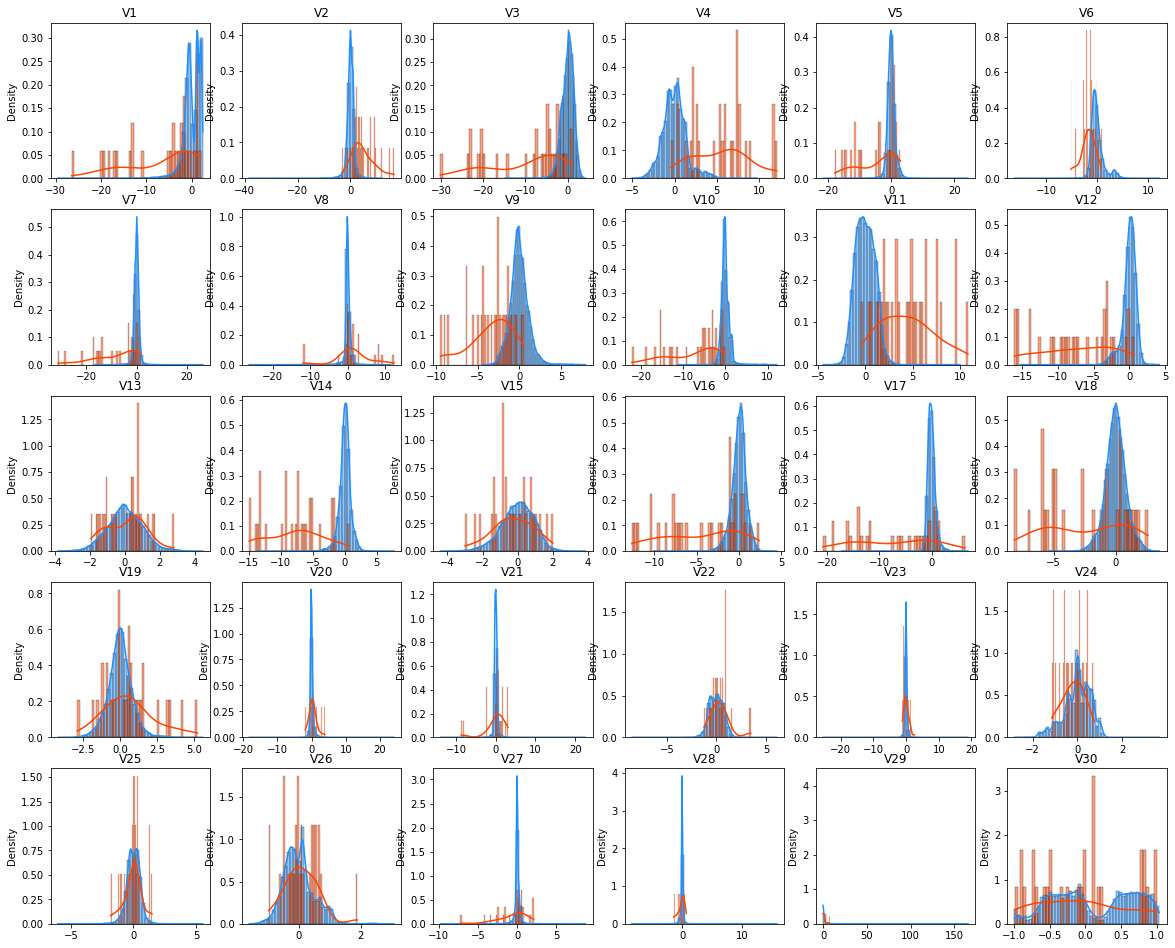

In [ ]:
# 데이터 분포 확인하기



In [ ]:
# 변수 제거

